分布：随时间的变化，最开始就分movies 和 show
	•	高评分影视作品的发布年份分布： yaru
高评分的电影在不同年份的分布情况如何？哪些年份发布的电影更容易获得较高的评分？
	•	高评分影视作品的时长分布：
高评分影视作品的时长（runtime）分布是怎样的？是否某一时长范围的电影更可能获得较高评分？
	•	高评分影视作品的年龄认证分布：  ning
高评分影视作品的年龄认证（age_certification）分布情况如何？不同年龄认证的电影评分有无显著差异？
	•	高评分影视作品的票数分布：
高评分电影的IMDB票数（imdb_votes）分布如何？票数较多的电影是否倾向于获得较高评分？

文本：电影标题的关键词分析：
通过分析高评分电影的标题（title），提取出常见的高频词或关键词，看看这些词是否有助于高评分的形成。例如，某些情感化词汇或特定类型的关键词是否更易获得较高的评分？
	•	电影描述的情感倾向分析：
分析高评分电影的描述（description）的情感倾向，看看这些电影的描述是否普遍带有积极情感，是否与评分之间存在关联？
	•	电影描述的词频分析：
对高评分电影的描述文本进行词频分析，找出描述中高频出现的词汇，探讨这些词汇是否与高评分之间有显著关系。

# clean the data

In [2]:
#!pip install jupyterlab
#!pip install ipywidgets


In [3]:
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

url = "https://raw.githubusercontent.com/hkusda7005group10/groupdata/main/7005groupdata.csv"
df = pd.read_csv(url)
df.head()


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
# filter "movie" type
df = df[df["type"] == "MOVIE"]
print(df.shape)
df.tail(2)


(3407, 11)


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [5]:
# Filter out the desired values
ls = ["index", "id", "title", "release_year", "age_certification", "imdb_score", "imdb_votes"]
df2 = df[ls].reset_index(drop=True)
df2.tail(2)

,index,id,title,release_year,age_certification,imdb_score,imdb_votes
3405,5280,tm1045018,Clash,2021,NaN,6.5,32.0
3406,5281,tm1098060,Shadow Parties,2021,NaN,6.2,9.0


In [6]:
# Filter age_certification with nan values
df3 = df2.dropna(subset = ["age_certification"])
df3

,index,id,title,release_year,age_certification,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,1976,R,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,1975,PG,8.2,530877.0
2,2,tm70993,Life of Brian,1979,R,8.0,392419.0
3,3,tm190788,The Exorcist,1973,R,8.1,391942.0
4,5,tm14873,Dirty Harry,1971,R,7.7,153463.0
...,...,...,...,...,...,...,...
3338,5196,tm983722,Prime Time,2021,R,5.2,1757.0
3342,5202,tm855340,Thalaivii,2021,G,5.9,30439.0
3347,5207,tm1099320,Convergence: Courage in a Crisis,2021,R,5.4,252.0
3349,5211,tm1120766,AngÃ¨le,2021,R,7.0,493.0


In [7]:
# View the data type of a specific column
print(df.dtypes['release_year'])
print(df.dtypes['age_certification'])

int64
object


# Have an overview of age_certification

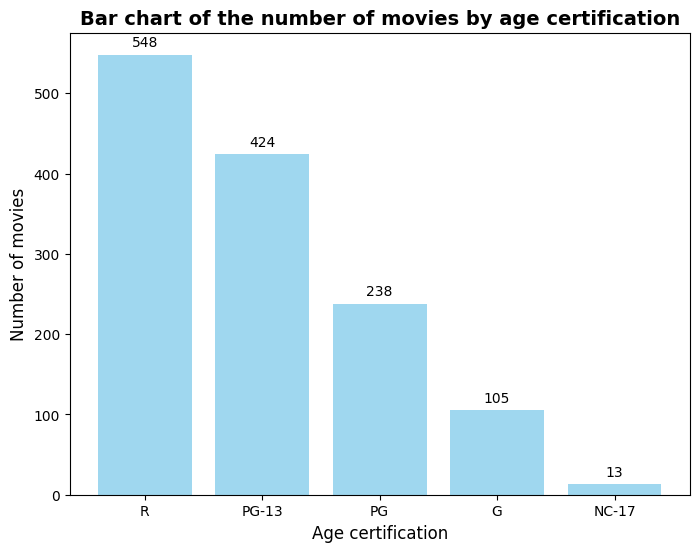

In [8]:
# Bar chart for the number of movies by age certification

# 统计每个年龄分级的电影数量
age_cert_counts = df3['age_certification'].value_counts()

# 绘制柱状图
plt.figure(figsize=(8, 6))
plt.bar(age_cert_counts.index, age_cert_counts.values, color='skyblue', alpha=0.8)

# 添加标题和标签
plt.title('Bar chart of the number of movies by age certification', fontsize=14, fontweight='bold')
plt.xlabel('Age certification', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)

# 在每个柱子上显示具体数量
for i, count in enumerate(age_cert_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.show()


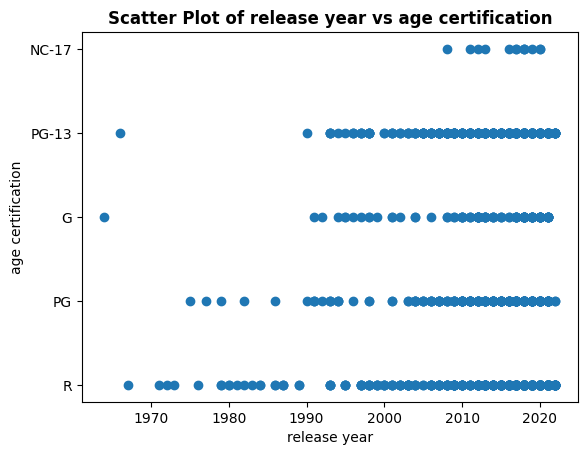

In [9]:
# Exploring changes in the distribution of age certification over years - Scatter Plot of release year vs age certification
plt.scatter(df3['release_year'], df3['age_certification'])
plt.title('Scatter Plot of release year vs age certification', fontweight='bold')
plt.xlabel('release year')
plt.ylabel('age certification')
plt.show()

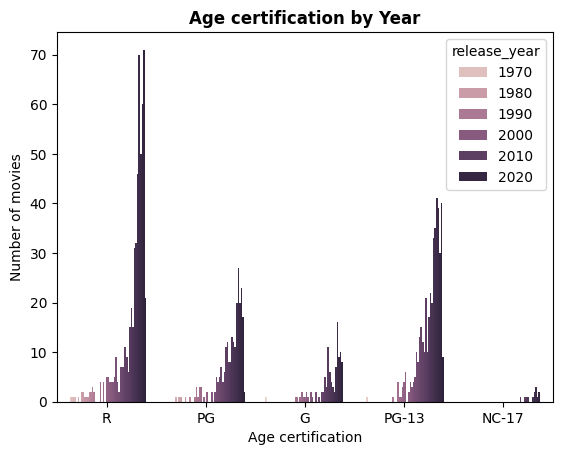

In [10]:
# Plotting the distribution of different age certifications per decade
sns.countplot(x='age_certification', hue='release_year', data=df3)
plt.title('Age certification by Year', fontweight='bold')
plt.xlabel('Age certification')
plt.ylabel('Number of movies')
plt.show()

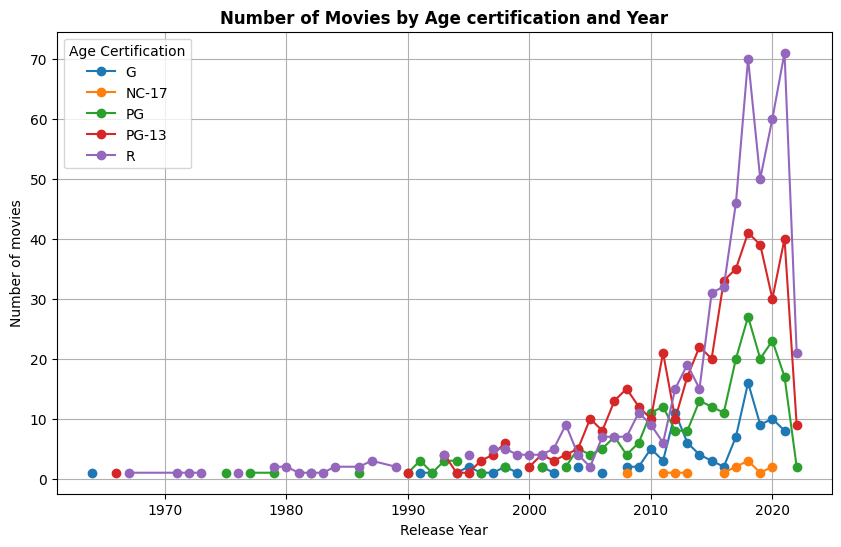

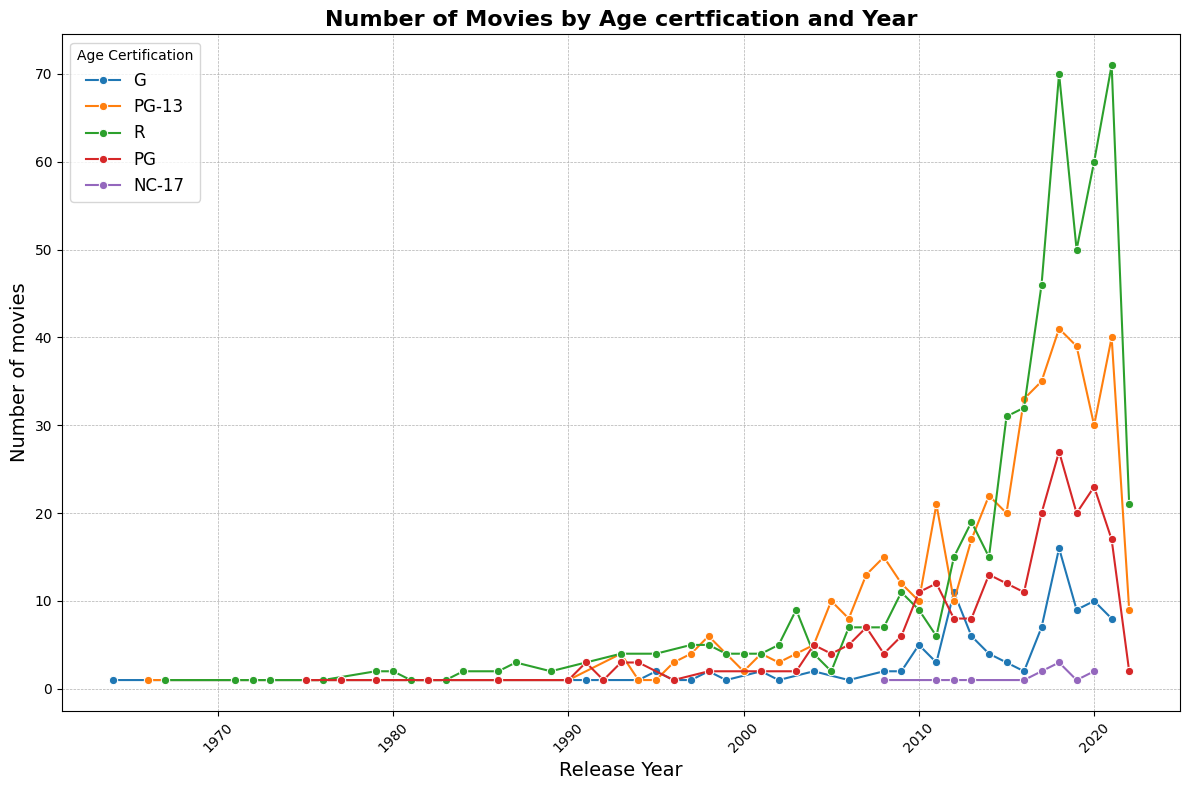

In [11]:
# Calculate the number of movies in age certification in each year
df4 = df3.groupby(["release_year", "age_certification"]).size().reset_index(name='count')

# Pivot the data so that each age certification is a column
df4_pivot = df4.pivot(index='release_year', columns='age_certification', values='count')

# Plot line graphs - plt
df4_pivot.plot(figsize=(10, 6), marker='o')
plt.title('Number of Movies by Age certification and Year', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of movies')
plt.legend(title='Age Certification')
plt.grid(True)
plt.show()


# Plot Line Charts with seaborn
plt.figure(figsize=(12, 8))  # 设置图形大小
sns.lineplot(data=df4, x="release_year", y="count", hue="age_certification", marker="o")


plt.title('Number of Movies by Age certfication and Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)

# Add a legend
plt.legend(title='Age Certification', fontsize=12)

# Show grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Rotate the x-axis labels for better display
plt.xticks(rotation=45)

# plot the figure
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

# Age_certification vs imdb_score

In [12]:
# Process imdb_score to 1 decimal place
df3['imdb_score'] = df3['imdb_score'].round(2)

# Categorize counts based on age_certification and imdb_score
df5 = df3.groupby(["age_certification","imdb_score"])["imdb_score"].count().reset_index(name="count")

# Check data
print(df5['imdb_score'].unique())
print(df5.dtypes["imdb_score"])

df5

[2.8 3.6 3.8 3.9 4.  4.3 4.4 4.5 4.7 4.8 5.1 5.2 5.3 5.4 5.5 5.6 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8
 7.9 8.  8.1 8.3 8.4 8.5 8.6 9.  3.3 5.7 2.  2.3 2.4 3.5 3.7 4.1 4.9 5.
 6.6 8.2 3.2 4.6 8.8 2.1 2.5 2.9 3.1 3.4 4.2 8.7]
float64


C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\1812671079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['imdb_score'] = df3['imdb_score'].round(2)


,age_certification,imdb_score,count
0,G,2.8,1
1,G,3.6,1
2,G,3.8,2
3,G,3.9,1
4,G,4.0,2
...,...,...,...
207,R,8.2,3
208,R,8.3,3
209,R,8.4,3
210,R,8.6,1


C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\3485231189.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df5_2_grouped = df5_2.groupby('imdb_score_group')['count'].sum().reset_index()
C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\3485231189.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="imdb_score_group", y="count", data=df5_2_grouped, palette="Set2")


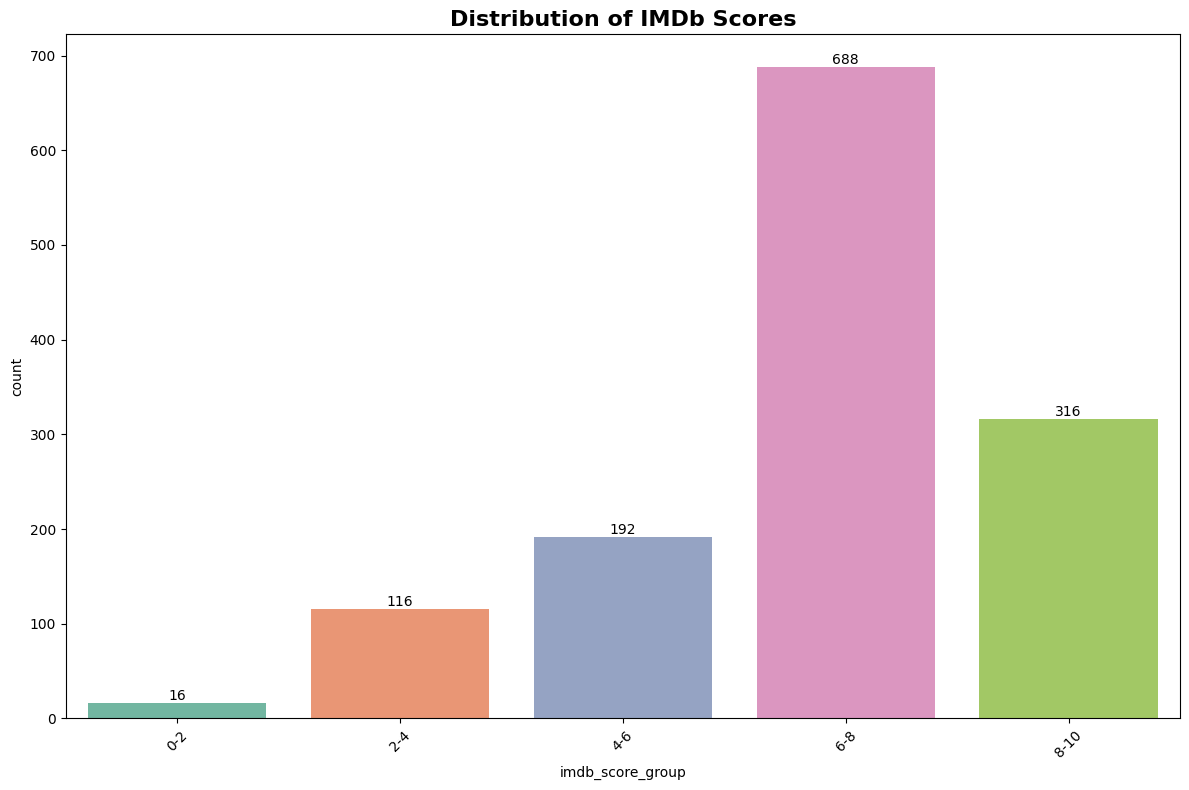

In [13]:
# Categorize counts based on imdb_score and sum them up
df5_2 = df3.groupby("imdb_score")['imdb_score'].count().reset_index(name="count")

# Add imdb_score_group based on the bins
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
df5_2['imdb_score_group'] = pd.cut(df5['imdb_score'], bins=bins, labels=labels, include_lowest=True)

# Group by imdb_score_group and sum the counts to get the total count for each group
df5_2_grouped = df5_2.groupby('imdb_score_group')['count'].sum().reset_index()

# set the color scheme
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="imdb_score_group", y="count", data=df5_2_grouped, palette="Set2")

# Add value labels above each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, str(int(height)),
             ha='center', va='bottom')

# Add Chart Title
plt.title('Distribution of IMDb Scores', fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\356644441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imdb_score", y="count", data=df5, palette="Set2")


Text(0.5, 1.0, 'Distribution of IMDb Scores')

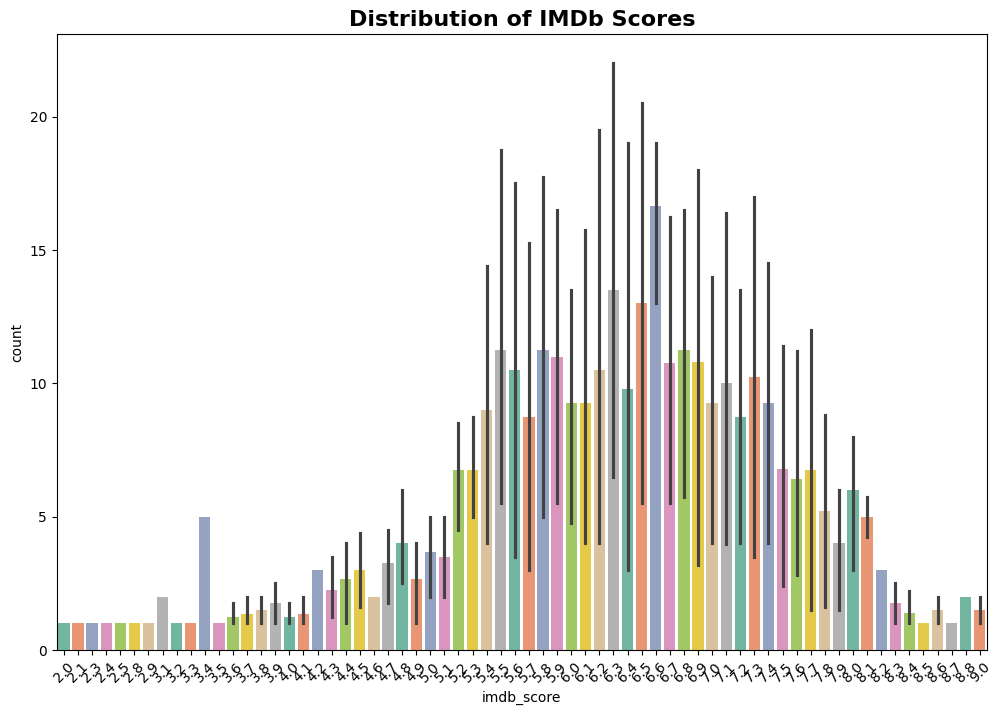

In [14]:
# Specific distribution of imdb_score
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
sns.barplot(x="imdb_score", y="count", data=df5, palette="Set2")
plt.title('Distribution of IMDb Scores', fontsize=16, fontweight='bold')

C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\1160556131.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_certification", y="count", hue="imdb_score", data=df5, ci=None)


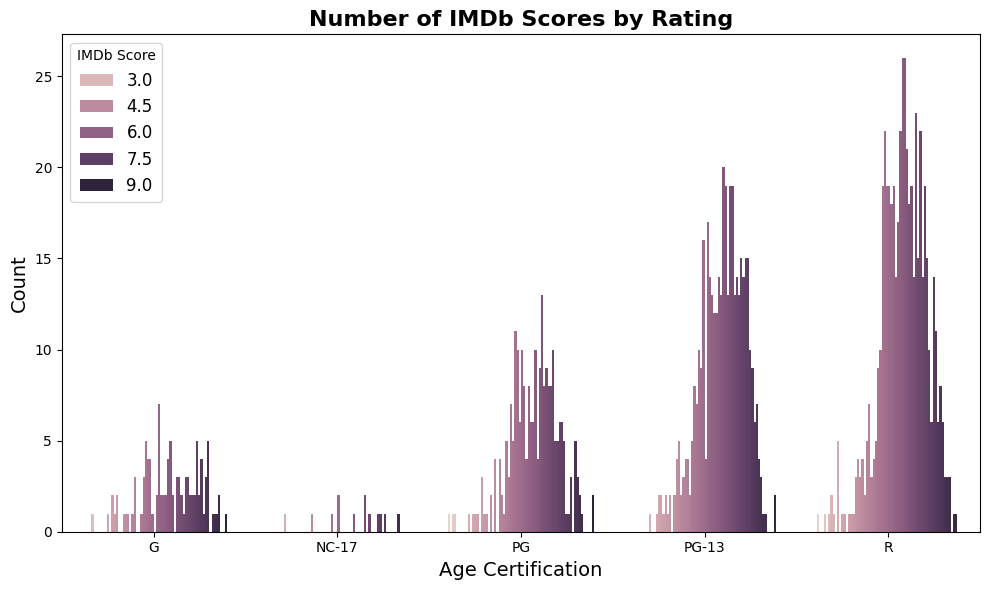

In [15]:
# Distribution of imdb_score based on age_certification
# 使用 seaborn 绘制堆叠条形图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.barplot(x="age_certification", y="count", hue="imdb_score", data=df5, ci=None)

# 添加图表标题和坐标轴标签
plt.title('Number of IMDb Scores by Rating', fontsize=16, fontweight='bold')
plt.xlabel('Age Certification', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 添加图例
plt.legend(title='IMDb Score', fontsize=12)

# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()



C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\2081848400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['imdb_score_rounded'] = df3['imdb_score'].round()
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

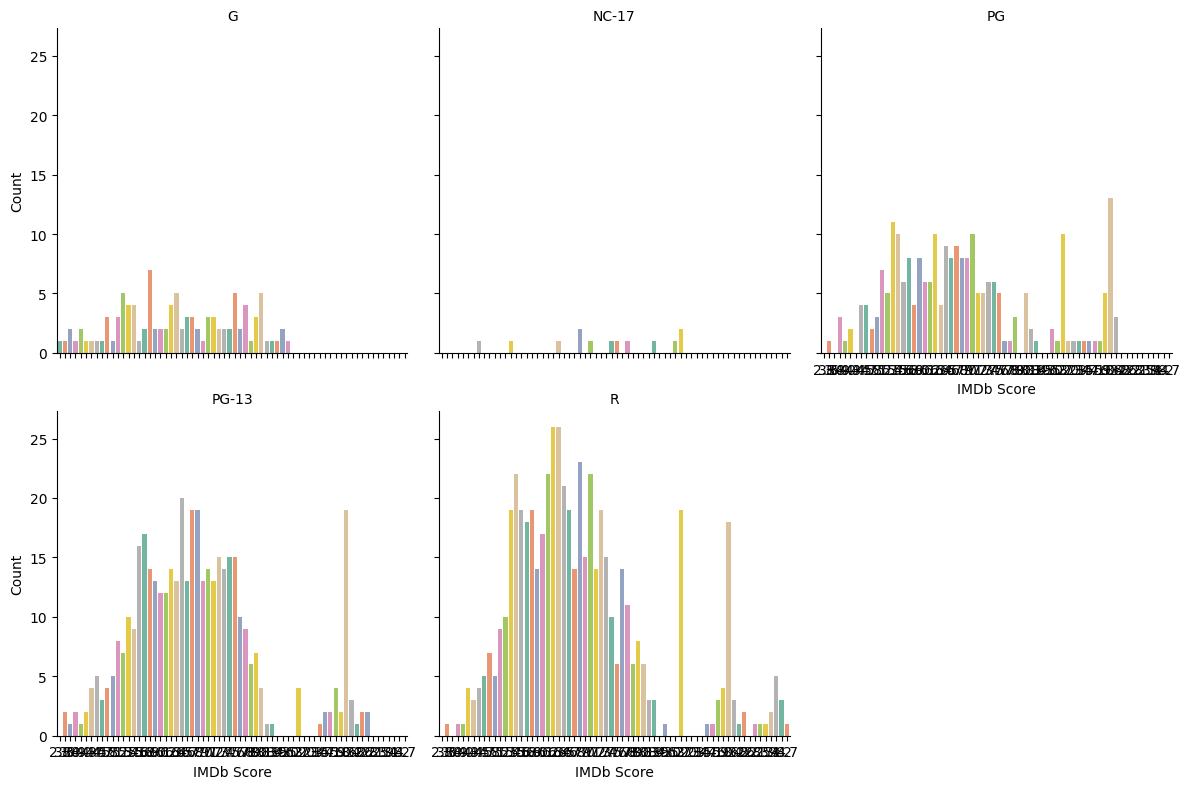

In [16]:
# 不将score做处理

# 计算每个评级和四舍五入后的 IMDb 评分的数量
df3['imdb_score_rounded'] = df3['imdb_score'].round()
df5 = df3.groupby(["age_certification", "imdb_score"])["imdb_score"].count().reset_index(name="count")

# 创建面板图
g = sns.FacetGrid(df5, col="age_certification", col_wrap=3, height=4)  # 根据评级创建子图
g.map(sns.barplot, "imdb_score", "count", order=df5['imdb_score'].unique(), palette="Set2")


# 添加标题和坐标轴标签
g.set_titles(col_template="{col_name}")  # 设置每个子图的标题为评级
g.set_axis_labels("IMDb Score", "Count")


# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\3633071898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['imdb_score_rounded'] = df3['imdb_score'].round()
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

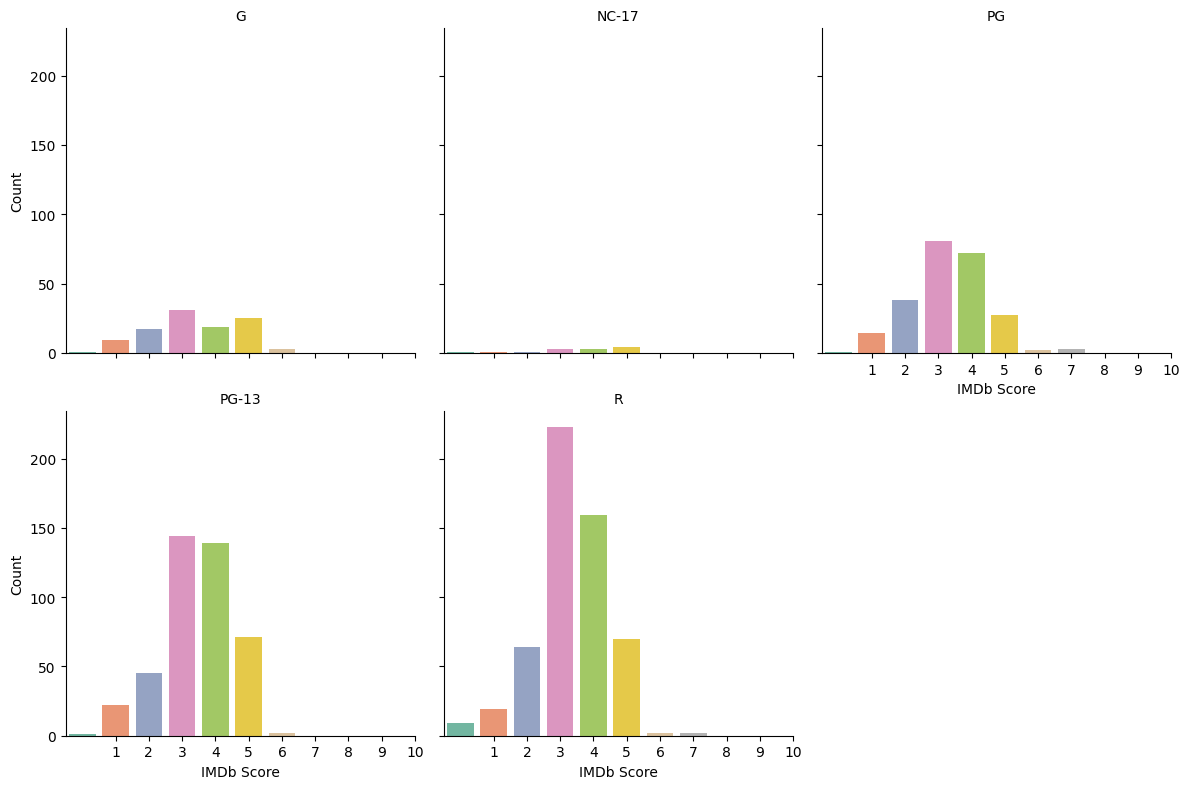

In [17]:
# Round the scores to integers to draw a clearer picture of the distribution

# 计算每个评级和四舍五入后的 IMDb 评分的数量
df3['imdb_score_rounded'] = df3['imdb_score'].round()
df6 = df3.groupby(["age_certification", "imdb_score_rounded"])["imdb_score_rounded"].count().reset_index(name="count")

# 创建面板图
g = sns.FacetGrid(df6, col="age_certification", col_wrap=3, height=4)  # 根据评级创建子图
g.map(sns.barplot, "imdb_score_rounded", "count", order=df6['imdb_score_rounded'].unique(), palette="Set2")


# 添加标题和坐标轴标签
g.set_titles(col_template="{col_name}")  # 设置每个子图的标题为评级
g.set_axis_labels("IMDb Score", "Count")

# 设置x轴的关键节点
key_imdb_scores = range(1, 11)  # 1到10的整数
for ax in g.axes.flat:
    ax.set_xticks(key_imdb_scores)  # 设置x轴刻度位置
    ax.set_xticklabels(key_imdb_scores)  # 设置x轴刻度标签

# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()



In [18]:
# 计算每个评级和 IMDb 评分的数量
df5 = df3.groupby(["age_certification", "imdb_score"])["imdb_score"].count().reset_index(name="count")

# 将 imdb_score 分组到更宽的区间内
bins = [0, 2, 4, 6, 8, 10]  # 定义区间边界
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']  # 定义区间标签
df5['imdb_score_group'] = pd.cut(df5['imdb_score'], bins=bins, labels=labels, right=False)

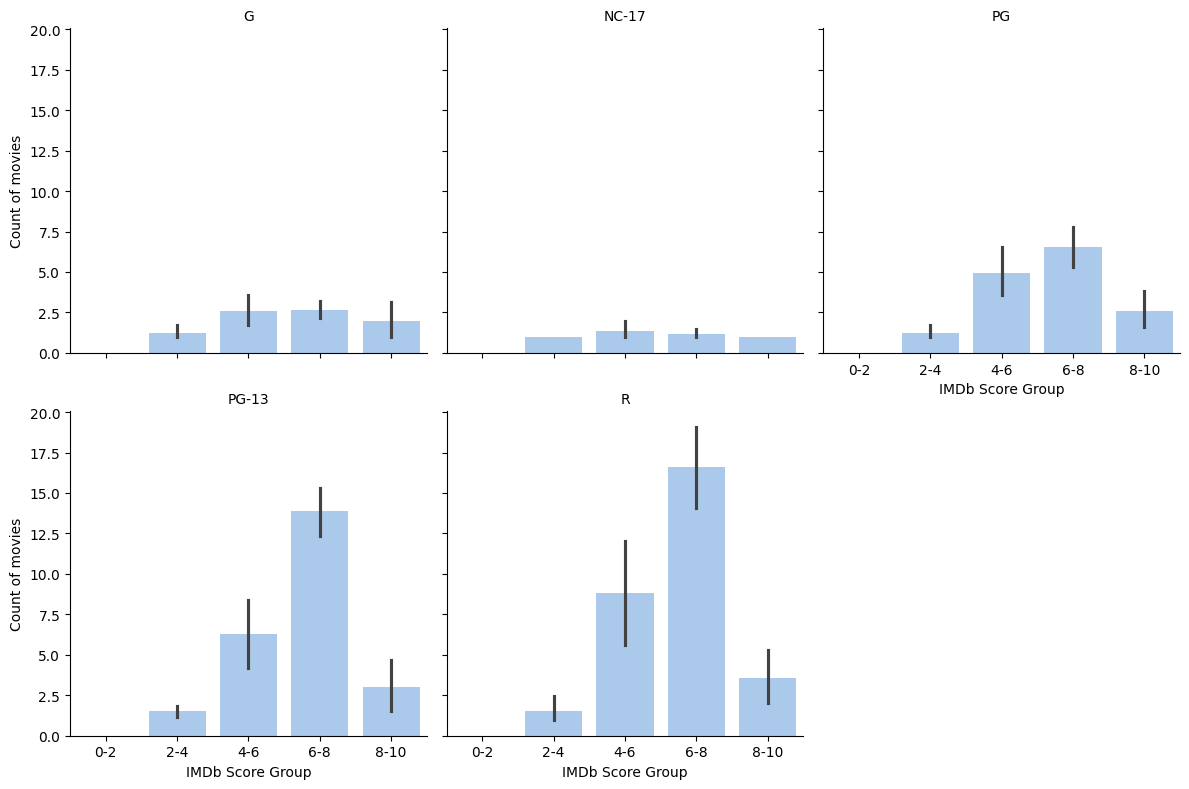

In [19]:
# 创建面板图
g = sns.FacetGrid(df5, col="age_certification", col_wrap=3, height=4, palette="Set2")

# 用于设置颜色方案
sns.set_palette("pastel")

# 绘制分组条形图
g.map(sns.barplot, "imdb_score_group", "count", order=labels)

# 添加标题和坐标轴标签
g.set_titles(col_template="{col_name}")  # 设置每个子图的标题为评级
g.set_axis_labels("IMDb Score Group", "Count of movies")

# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

# age_certification vs high_imdb_score

In [20]:
# 过滤出高评分电影（以7分为界限）
df3["high_rated_score"]= df3["imdb_score"] >= 7

df3


C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\4120170115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["high_rated_score"]= df3["imdb_score"] >= 7


,index,id,title,release_year,age_certification,imdb_score,imdb_votes,imdb_score_rounded,high_rated_score
0,0,tm84618,Taxi Driver,1976,R,8.3,795222.0,8.0,True
1,1,tm127384,Monty Python and the Holy Grail,1975,PG,8.2,530877.0,8.0,True
2,2,tm70993,Life of Brian,1979,R,8.0,392419.0,8.0,True
3,3,tm190788,The Exorcist,1973,R,8.1,391942.0,8.0,True
4,5,tm14873,Dirty Harry,1971,R,7.7,153463.0,8.0,True
...,...,...,...,...,...,...,...,...,...
3338,5196,tm983722,Prime Time,2021,R,5.2,1757.0,5.0,False
3342,5202,tm855340,Thalaivii,2021,G,5.9,30439.0,6.0,False
3347,5207,tm1099320,Convergence: Courage in a Crisis,2021,R,5.4,252.0,5.0,False
3349,5211,tm1120766,AngÃ¨le,2021,R,7.0,493.0,7.0,True


In [21]:
df6 = df3.groupby(["age_certification", "release_year"])["high_rated_score"].count().reset_index(name="high_rated_score_count")
df6

,age_certification,release_year,high_rated_score_count
0,G,1964,1
1,G,1991,1
2,G,1992,1
3,G,1994,1
4,G,1995,2
...,...,...,...
137,R,2018,70
138,R,2019,50
139,R,2020,60
140,R,2021,71


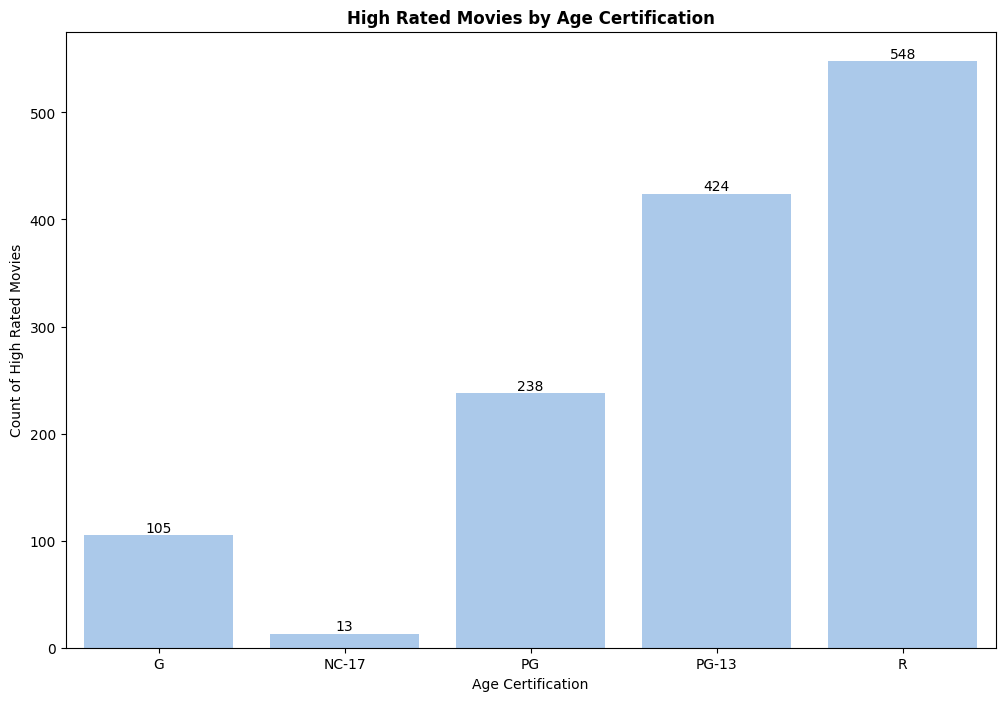

In [22]:
df7 = df6.groupby("age_certification")["high_rated_score_count"].sum().reset_index(name="high_rated_score_count2")

# 绘制条形图
plt.figure(figsize=(12, 8))
barplot2 = sns.barplot(x="age_certification", y="high_rated_score_count2", data=df7)

# 在每个条形图上方添加数值标签
for p in barplot2.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, str(int(height)), ha="center", va='bottom')

# 添加图表标题和轴标签
plt.title('High Rated Movies by Age Certification', fontweight='bold')
plt.xlabel('Age Certification')
plt.ylabel('Count of High Rated Movies')

# 显示图表
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\1245717480.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_certification", y="high_rated_score_count", hue="release_year", data=df6, ci=None)


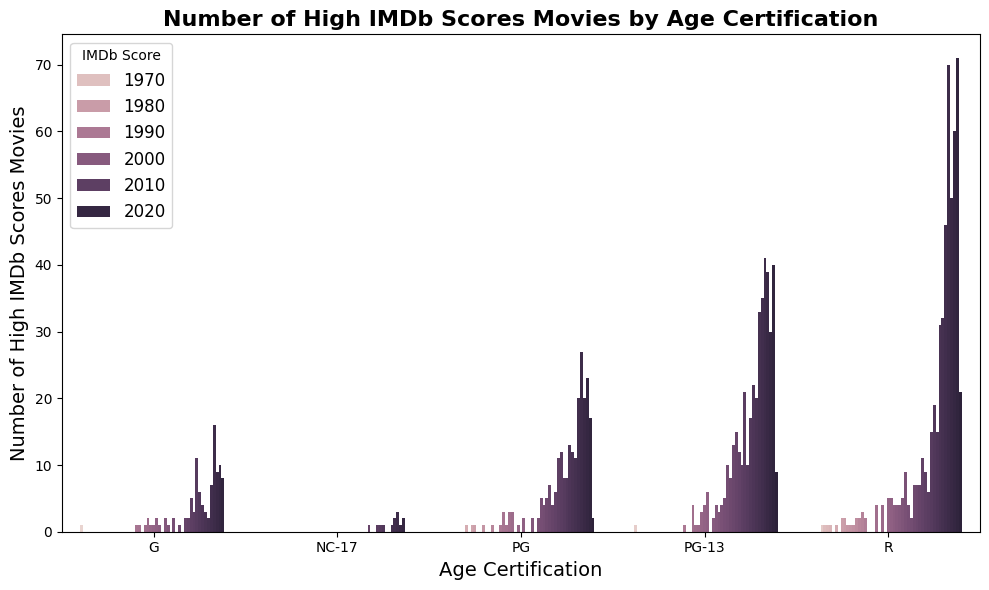

In [23]:
# 根据年龄评级和发布年份进行的高评分分布
# 使用 seaborn 绘制堆叠条形图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.barplot(x="age_certification", y="high_rated_score_count", hue="release_year", data=df6, ci=None)


# 添加图表标题和坐标轴标签
plt.title('Number of High IMDb Scores Movies by Age Certification', fontsize=16, fontweight='bold')
plt.xlabel('Age Certification', fontsize=14)
plt.ylabel('Number of High IMDb Scores Movies', fontsize=14)

# 添加图例
plt.legend(title='IMDb Score', fontsize=12)

# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Ning\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without ass

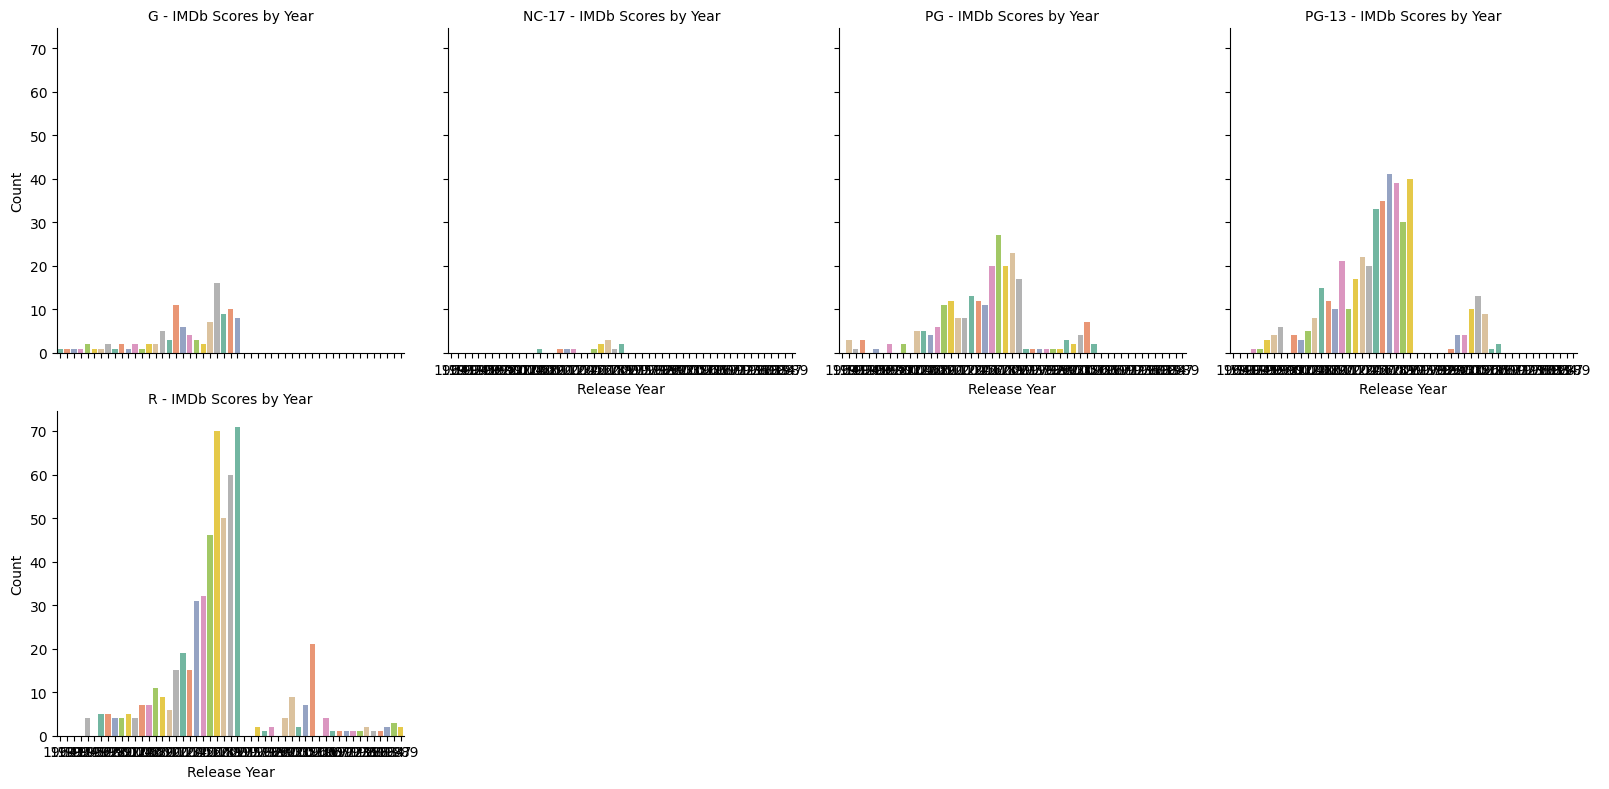

In [24]:
# 高评分、年龄评级、年份
# 1. 分面条形图（Facet Bar Plot）
g = sns.FacetGrid(df6, col="age_certification", col_wrap=4, height=4)
g.map(sns.barplot, "release_year", "high_rated_score_count", palette="Set2")
g.add_legend()
g.set_titles("{col_name} - IMDb Scores by Year")
g.set_axis_labels("Release Year", "Count")
plt.tight_layout()
plt.show()

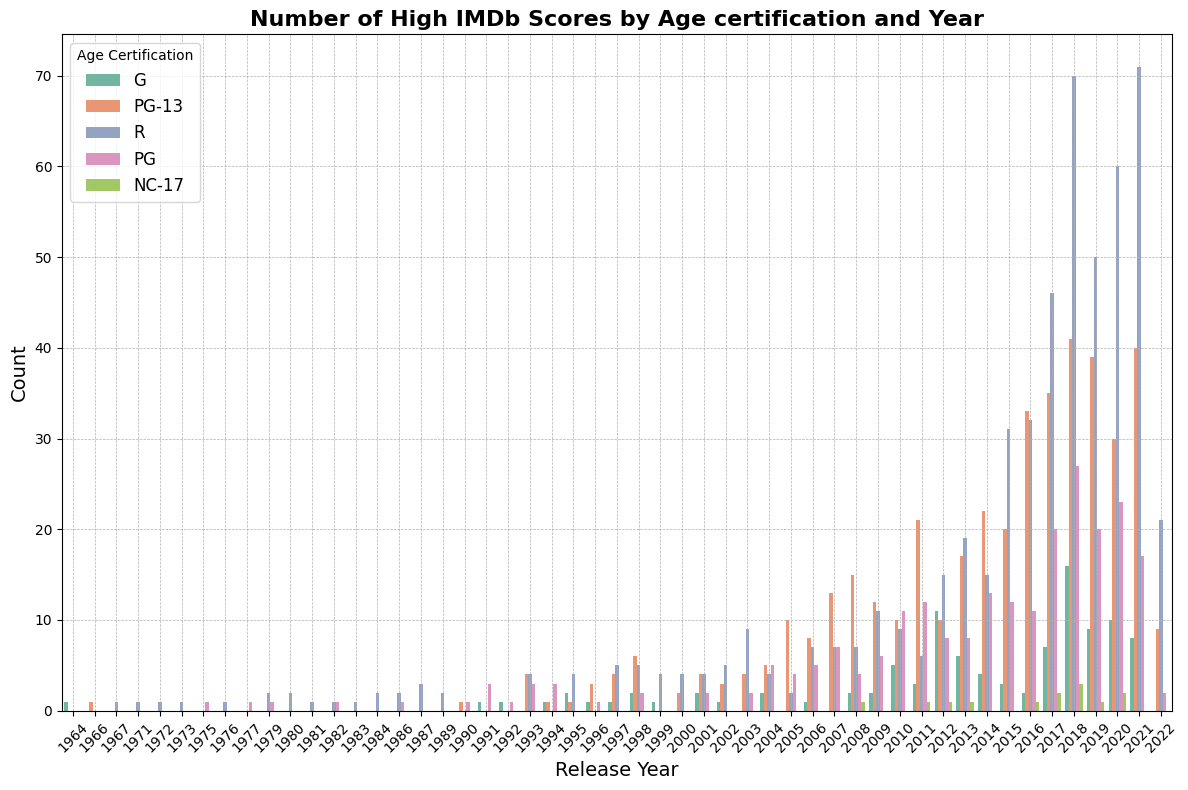

In [25]:
# 2. 堆叠条形图（Stacked Bar Plot）
plt.figure(figsize=(12, 8))
sns.barplot(x="release_year", y="high_rated_score_count", hue="age_certification", data=df6, palette="Set2")
plt.title('Number of High IMDb Scores by Age certification and Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Age Certification', fontsize=12)

# 添加网格线
plt.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.tight_layout()
plt.show()

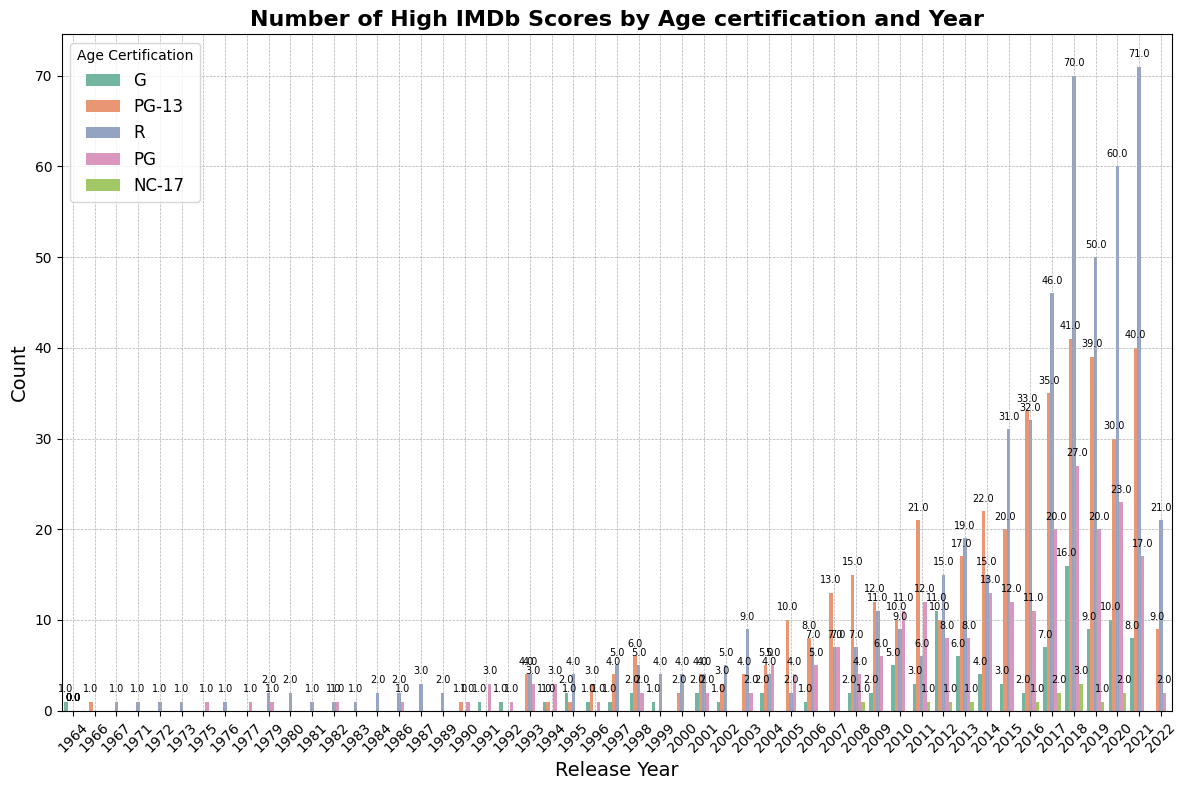

In [26]:
# 更加清晰的版本
plt.figure(figsize=(12, 8))
sns.barplot(x="release_year", y="high_rated_score_count", hue="age_certification", data=df6, palette="Set2")

# 添加图表标题和坐标轴标签
plt.title('Number of High IMDb Scores by Age certification and Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 添加图例
plt.legend(title='Age Certification', fontsize=12)

# 添加网格线
plt.grid(True, linestyle='--', linewidth=0.5)


# 添加数据标签
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points',
                 fontsize=7)

# 旋转 x 轴标签以便更好地显示
plt.xticks(rotation=45)

# 自动调整子图参数，使之填充整个图像区域
plt.tight_layout()
plt.show()

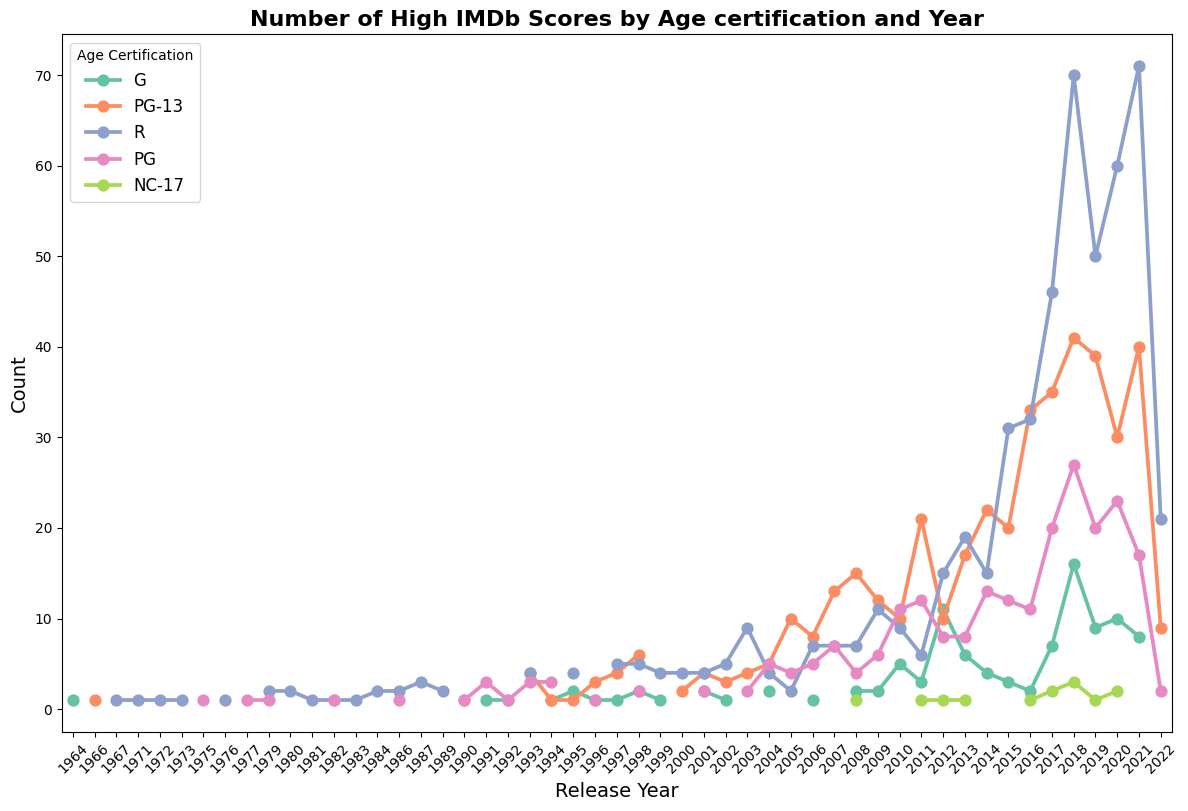

In [27]:
# 3. 点图（Dot Plot）
# 可以清晰地展示每个评级在不同年份的评分数量，特别适合展示时间序列数据。
plt.figure(figsize=(12, 8))
sns.pointplot(x="release_year", y="high_rated_score_count", hue="age_certification", data=df6, palette="Set2")
plt.title('Number of High IMDb Scores by Age certification and Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Age Certification', fontsize=12)
plt.tight_layout()

plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.show()

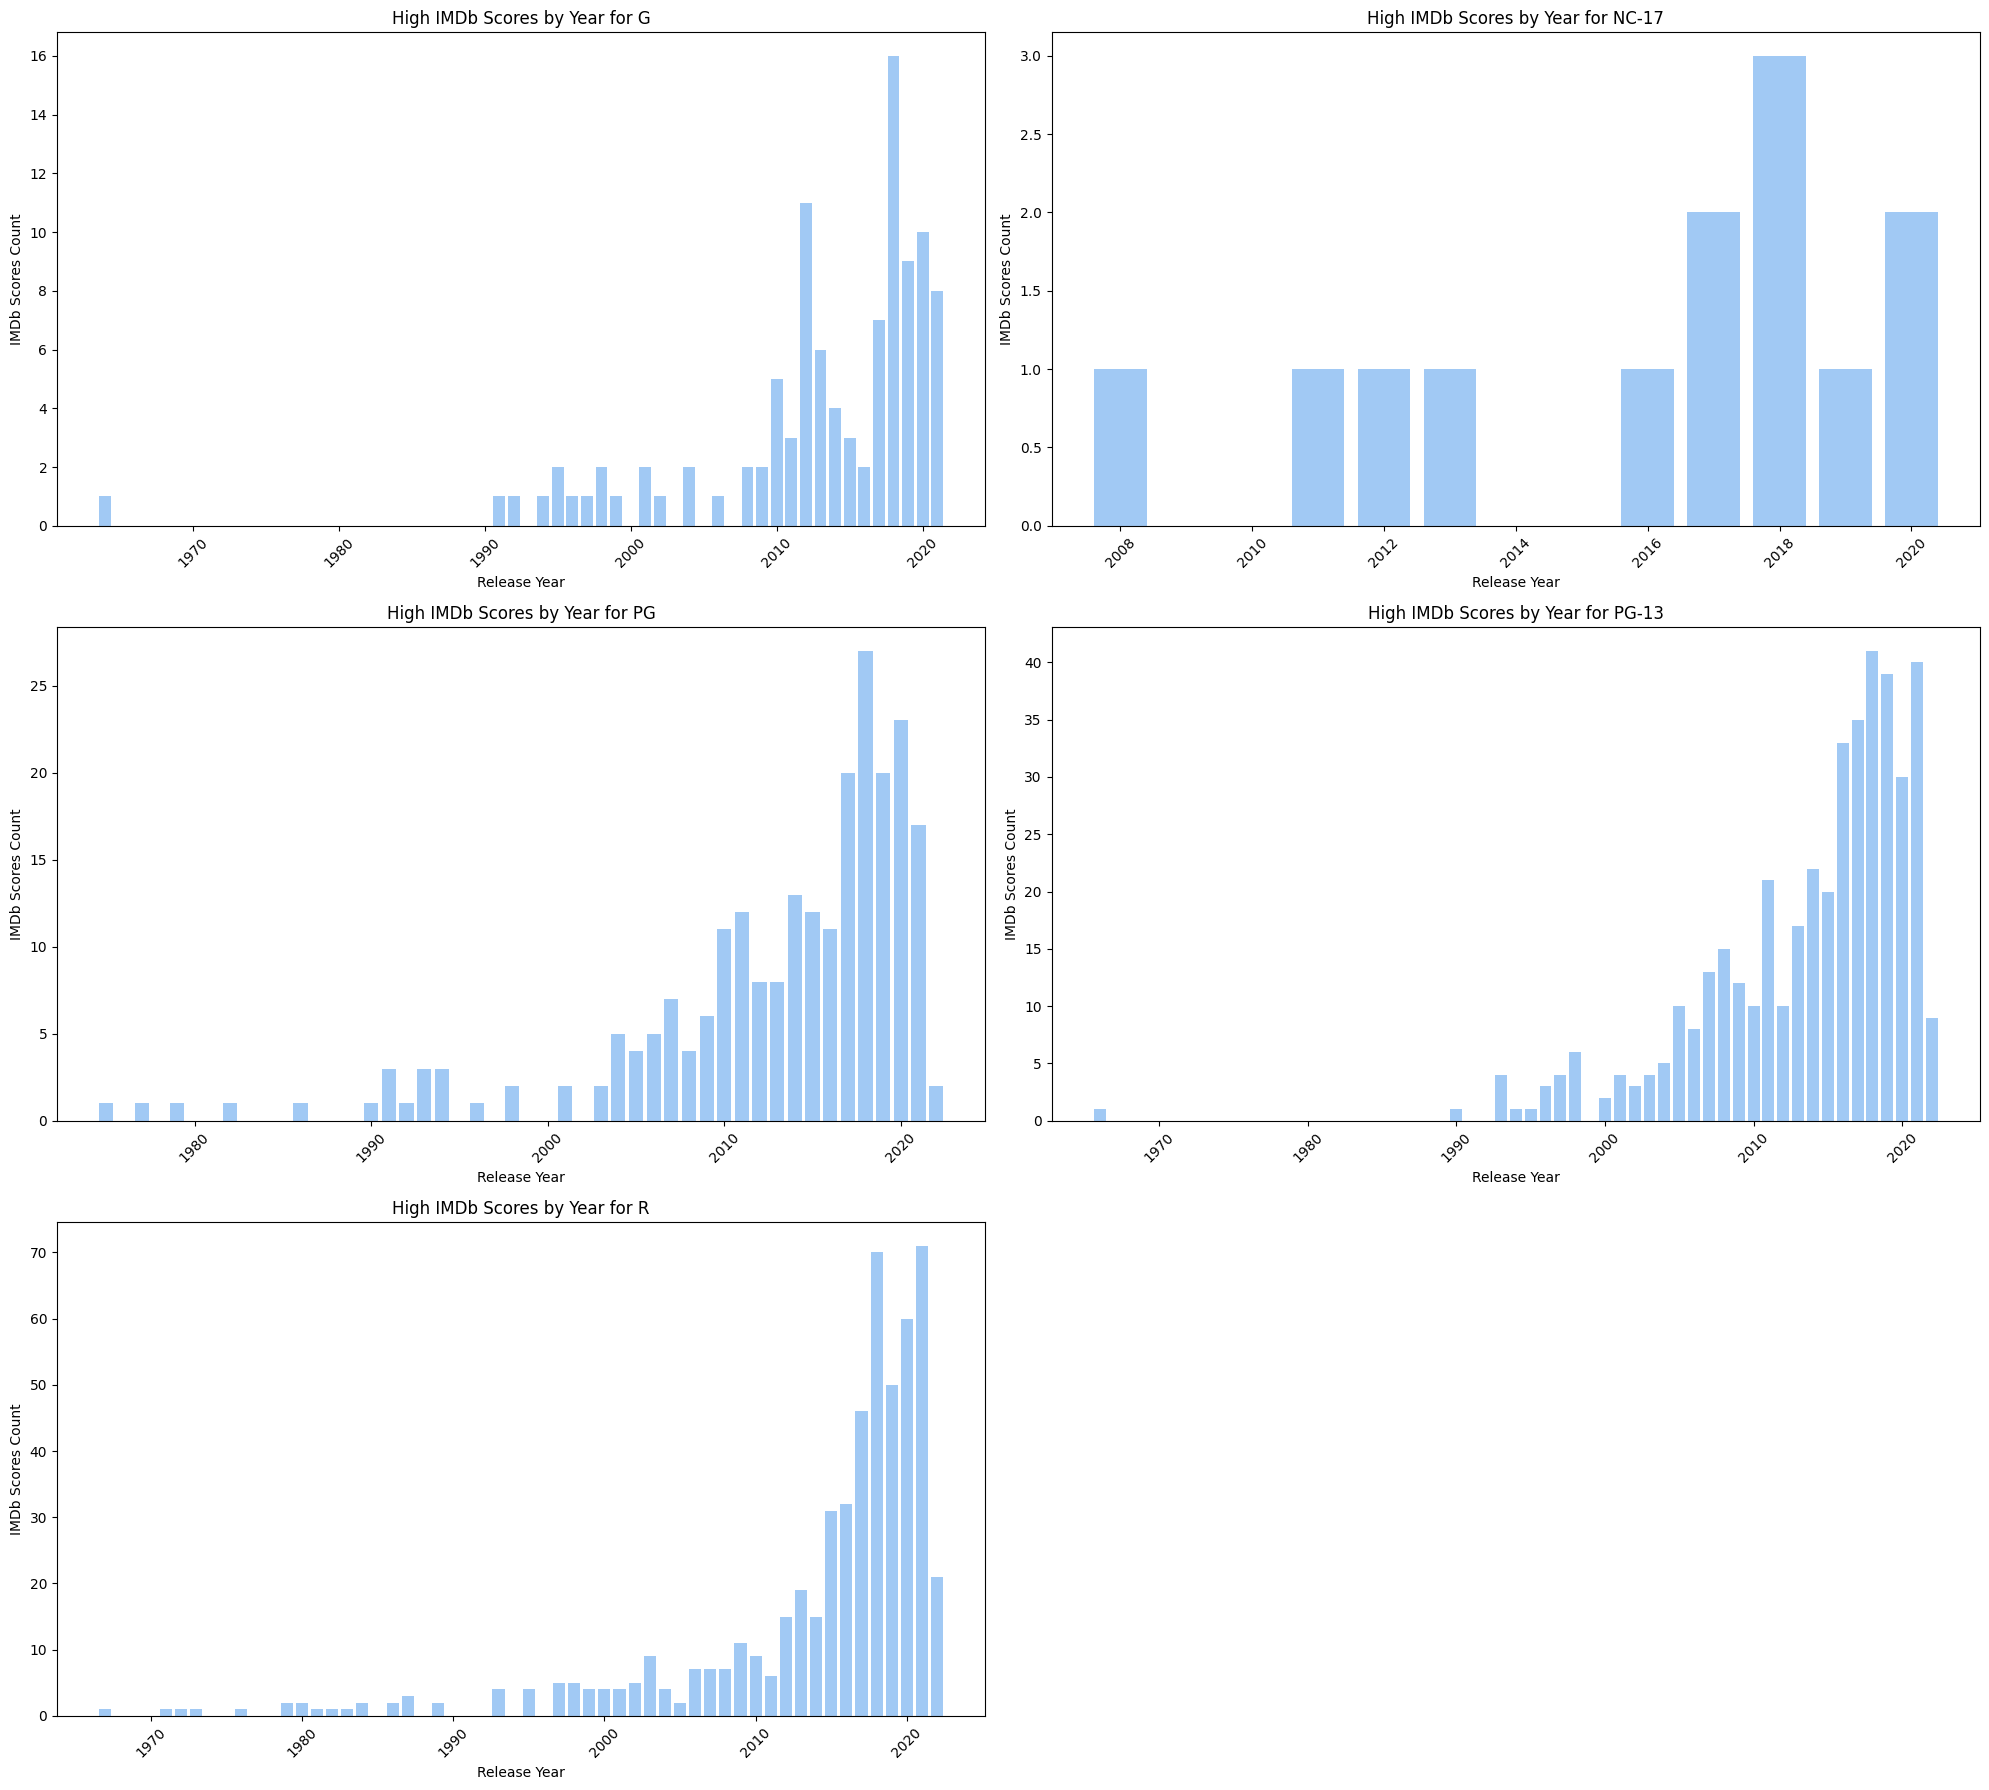

In [28]:
import matplotlib.pyplot as plt

# 获取年龄评级的唯一值
certifications = df6['age_certification'].unique()

# 计算需要多少行和列来放置所有子图
n_rows = (len(certifications) + 1) // 2  # 向上取整，确保有足够的行
n_cols = 2  # 假设我们想要每行两个子图

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows))

# 遍历每个年龄评级，并在子图上绘制条形图
for i, certification in enumerate(certifications):
    # 计算当前子图的索引
    row = i // n_cols
    col = i % n_cols
    
    # 选择当前子图
    ax = axes[row, col] if n_rows > 1 else axes[col]
    
    # 绘制条形图
    ax.bar(df6[df6['age_certification'] == certification]['release_year'], 
           df6[df6['age_certification'] == certification]['high_rated_score_count'])
    ax.set_title(f'High IMDb Scores by Year for {certification}')
    ax.set_xlabel('Release Year')
    ax.set_ylabel('IMDb Scores Count')
    ax.tick_params(axis='x', rotation=45)

# 如果子图数量不足，隐藏多余的子图
if n_rows * n_cols > len(certifications):
    for i in range(len(certifications), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()

In [29]:
# 交互式图表
# 对于非常密集的数据，使用交互式图表可以让用户通过缩放和平移来查看详细信息。
# !pip install plotly

import plotly.express as px

fig = px.bar(df6, x='release_year', y='high_rated_score_count', color='age_certification',
             labels={'high_rated_score_count': 'High IMDb Scores Count'},
             title='Number of High IMDb Scores by Age certification and Year')
fig.show()

In [30]:
# pip install --upgrade nbformat

# 统计验证：年龄认证与评分的关系

假设
H0（原假设）：age_certification 与高评分无关。
H1（备选假设）：age_certification 与高评分有关。

In [31]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 数据清理：只保留有 age_certification 的行，并新增高评分字段
df_clean = df.dropna(subset=['age_certification', 'imdb_score'])
df_clean['high_score'] = df_clean['imdb_score'] >= 7

# 按 age_certification 分组统计高评分和低评分数量
age_cert_table = pd.crosstab(df_clean['age_certification'], df_clean['high_score'])

# 卡方检验
chi2, p, dof, expected = stats.chi2_contingency(age_cert_table)

# 输出结果
print("Chi-Square Test Results")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 判断结果
if p < 0.05:
    print("There is a statistically significant relationship between age certification and high scores.")
else:
    print("No statistically significant relationship found.")


Chi-Square Test Results
Chi2 Statistic: 7.058908780766875
P-value: 0.13280772123948614
Degrees of Freedom: 4
Expected Frequencies:
[[ 72.89909639  32.10090361]
 [  9.02560241   3.97439759]
 [165.23795181  72.76204819]
 [294.37349398 129.62650602]
 [380.46385542 167.53614458]]
No statistically significant relationship found.


C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\1412882358.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. 可视化数据分布：热力图（Heatmap）
使用卡方检验的实际观测值和期望值（expected frequencies），绘制热力图来直观展示分组数据的偏差。

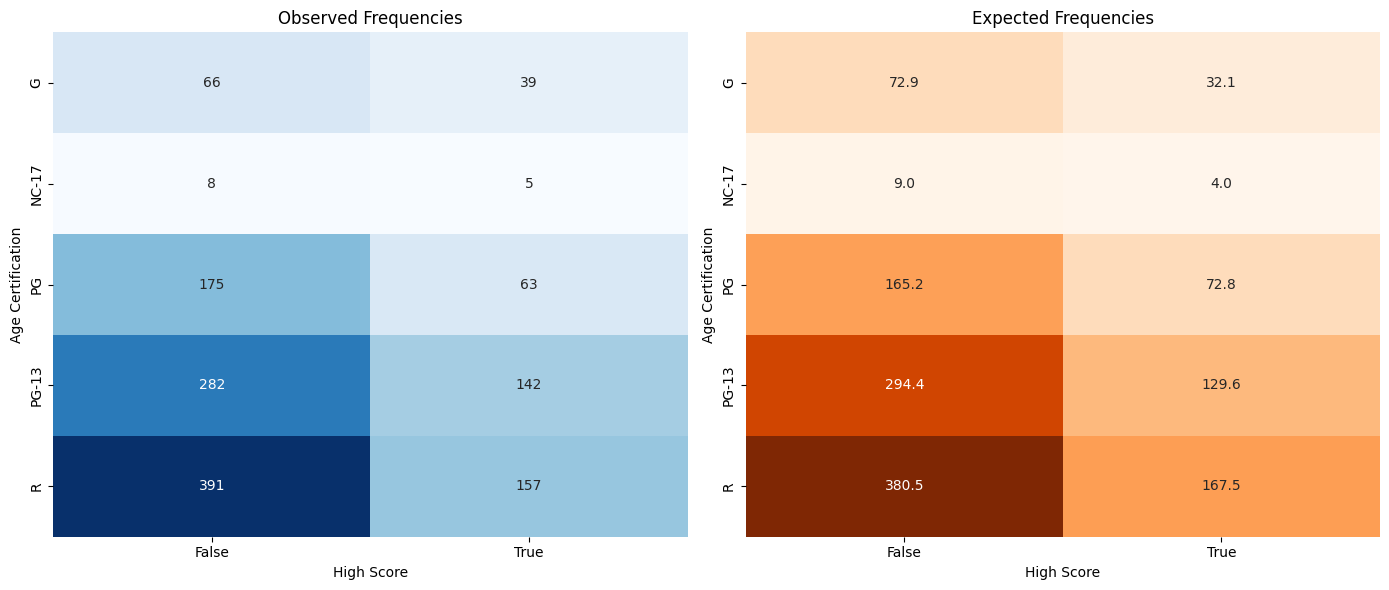

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建实际值和期望值的DataFrame
observed = age_cert_table  # 卡方检验的实际值
expected_df = pd.DataFrame(expected, index=age_cert_table.index, columns=age_cert_table.columns)

# 绘制实际值和期望值的热力图
plt.figure(figsize=(14, 6))

# 实际值热力图
plt.subplot(1, 2, 1)
sns.heatmap(observed, annot=True, fmt=".0f", cmap="Blues", cbar=False)
plt.title("Observed Frequencies")
plt.xlabel("High Score")
plt.ylabel("Age Certification")

# 期望值热力图
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=True, fmt=".1f", cmap="Oranges", cbar=False)
plt.title("Expected Frequencies")
plt.xlabel("High Score")
plt.ylabel("Age Certification")

plt.tight_layout()
plt.show()


2. 显示偏差：差值热力图
通过绘制实际值和期望值的差值，直观展现每个分组中偏差的大小和方向。

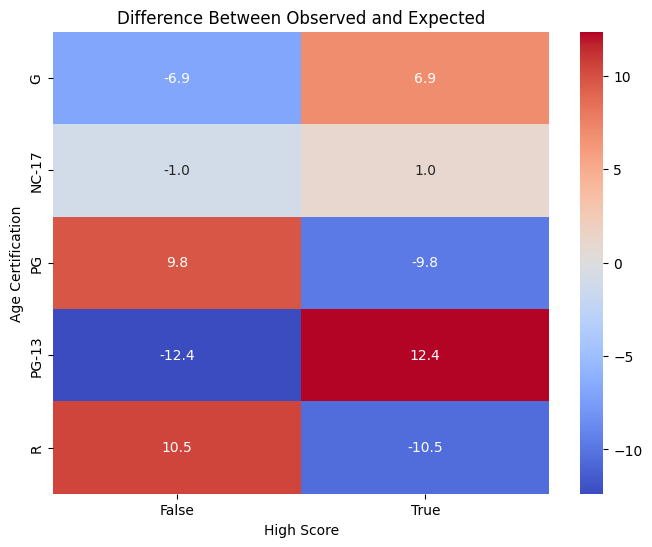

In [33]:
# 计算差值
difference = observed - expected_df

# 绘制差值热力图
plt.figure(figsize=(8, 6))
sns.heatmap(difference, annot=True, fmt=".1f", cmap="coolwarm", center=0, cbar=True)
plt.title("Difference Between Observed and Expected")
plt.xlabel("High Score")
plt.ylabel("Age Certification")
plt.show()


3. 可视化显著性：条形图
如果卡方检验的结果显著，可以用条形图展示每个年龄分级中高评分电影的比例差异

4. 卡方统计量显著性：文本嵌入
将 chi2 和 p-value 等检验结果用表格展示在图下或图旁边，以便更好地理解显著性。

C:\Users\Ning\AppData\Local\Temp\ipykernel_12596\3517584220.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




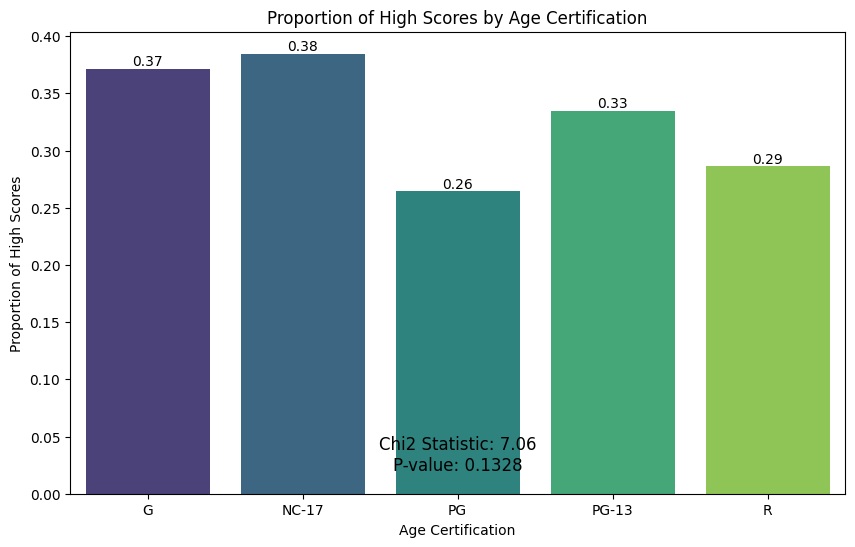

In [34]:
# 计算高评分比例
age_cert_proportion = df_clean.groupby('age_certification')['high_score'].mean().reset_index()

# 绘制条形图
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='age_certification', y='high_score', data=age_cert_proportion, palette="viridis")

# 在每个柱子上显示具体数值
for bar in barplot.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  # 获取柱子中心的 x 坐标
    bar_y = bar.get_height()  # 获取柱子的高度（y 值）
    plt.text(bar_x, bar_y, f"{bar_y:.2f}", ha='center', va='bottom', fontsize=10)  # 添加数值

# 添加标题和轴标签
plt.title("Proportion of High Scores by Age Certification")
plt.xlabel("Age Certification")
plt.ylabel("Proportion of High Scores")
plt.xticks()


# 添加统计信息
plt.text(0.5, 0.05, f"Chi2 Statistic: {chi2:.2f}\nP-value: {p:.4f}", fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.show()


如何选择合适的可视化方法
如果想突出分布偏差：使用热力图（Observed vs. Expected）。
如果想展示差异大小：使用差值热力图（Difference Heatmap）。
如果想强调高评分比例：使用条形图并结合统计结论。

高评分比例与数量的矛盾性

虽然 NC-17 的高评分比例最高，但绝对数量却是最少的（仅 13 部）。
R 和 PG-13 分级的高评分比例中等，但它们的电影基数大，因此高评分电影的绝对数量遥遥领先。

可能的观点

NC-17 分级的电影虽少，但更倾向于获得高评分，可能与其较严格的内容审查标准或小众高质量的制作有关。
R 和 PG-13 分级的电影占高评分电影的主要数量，可能是因为这两个分级的电影覆盖了更广泛的观众群体，制作规模和题材更为多样。

进一步验证

是否存在基数效应（即基数大的分级在绝对数量上更可能有高评分电影）。
可结合总电影数量（按 age_certification 分组），计算高评分电影的比例差异与显著性。


1. 计算基数（总电影数）

In [35]:
# 按 age_certification 分组统计总电影数
age_cert_total = df_clean.groupby('age_certification').size().reset_index(name='total_movies')

# 合并总电影数和高评分比例
age_cert_proportion = df_clean.groupby('age_certification')['high_score'].mean().reset_index()
age_cert_summary = pd.merge(age_cert_proportion, age_cert_total, on='age_certification')
age_cert_summary.rename(columns={'high_score': 'proportion_high_scores'}, inplace=True)

# 输出结果表
print(age_cert_summary)


  age_certification  proportion_high_scores  total_movies
0                 G                0.371429           105
1             NC-17                0.384615            13
2                PG                0.264706           238
3             PG-13                0.334906           424
4                 R                0.286496           548


2. 可视化：结合比例和基数
条形图：分级高评分比例与总电影数量

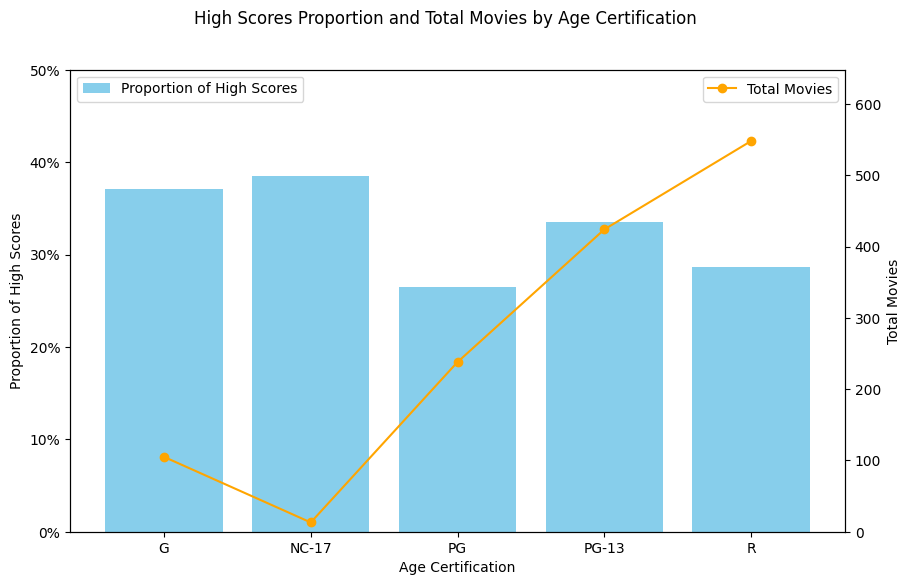

In [36]:
import matplotlib.ticker as mtick

# 创建条形图，双轴显示比例和数量
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制高评分比例（左轴）
ax1.bar(age_cert_summary['age_certification'], age_cert_summary['proportion_high_scores'], color='skyblue', label='Proportion of High Scores')
ax1.set_ylabel('Proportion of High Scores')
ax1.set_ylim(0, 0.5)  # 设置比例范围
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 转换为百分比格式

# 绘制总电影数（右轴）
ax2 = ax1.twinx()
ax2.plot(age_cert_summary['age_certification'], age_cert_summary['total_movies'], color='orange', marker='o', label='Total Movies')
ax2.set_ylabel('Total Movies')
ax2.set_ylim(0, age_cert_summary['total_movies'].max() + 100)  # 设置总数范围

# 添加标题和图例
fig.suptitle('High Scores Proportion and Total Movies by Age Certification')
ax1.set_xlabel('Age Certification')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


通过图表，可以从以下两个角度分析：

比例与基数的关系：
分级高评分比例是否与基数正相关（如 PG-13 和 R 的基数较大，但比例中等）。
NC-17 虽基数小，但高评分比例高，可能反映质量优于数量。
基数效应：
绝对数量大的分级（如 R 和 PG-13）在高评分电影中占主导地位。
小基数分级的比例是否足够高，值得进一步探讨。